
# **<center>  Prediction Using Unsupervised ML - Iris Dataset.</center>**

> ### **The Dataset is Iris Dataset, contains 6 columns and 150 records.**

> # **Goals:**
>- [ ] Find The Optimum Number of Cluster From The Dataset, Using K-Means Clustering.
>- [ ] Visualize The Optimum Number and The Output.

&nbsp;
> # ***Mohammed Mahameed***

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
pd.set_option('display.max_rows', None)

## Reading The Data

In [3]:
df = pd.read_csv('Iris.csv', index_col=0)

In [207]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


## Showing The Dataset Summary

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


> # **EDA (Exploratory Data Analysis)**

## Heatmap of The Features Correlation

***
It Showing That There is a HIGH Correlation
1. Between `PetalLengthCM` and `PetalWidthCM` With 96% <br>
1. And Also, There are High Correlation Between `SepalLengthCM` and `PetalLenghtCM` With 87% <br>
1. And Between `SepalLengthCM` and `PetalWidthCM` With 82%
***

C:\Users\imohd\AppData\Local\Temp\ipykernel_13984\3396827823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=0.1, linecolor='white')


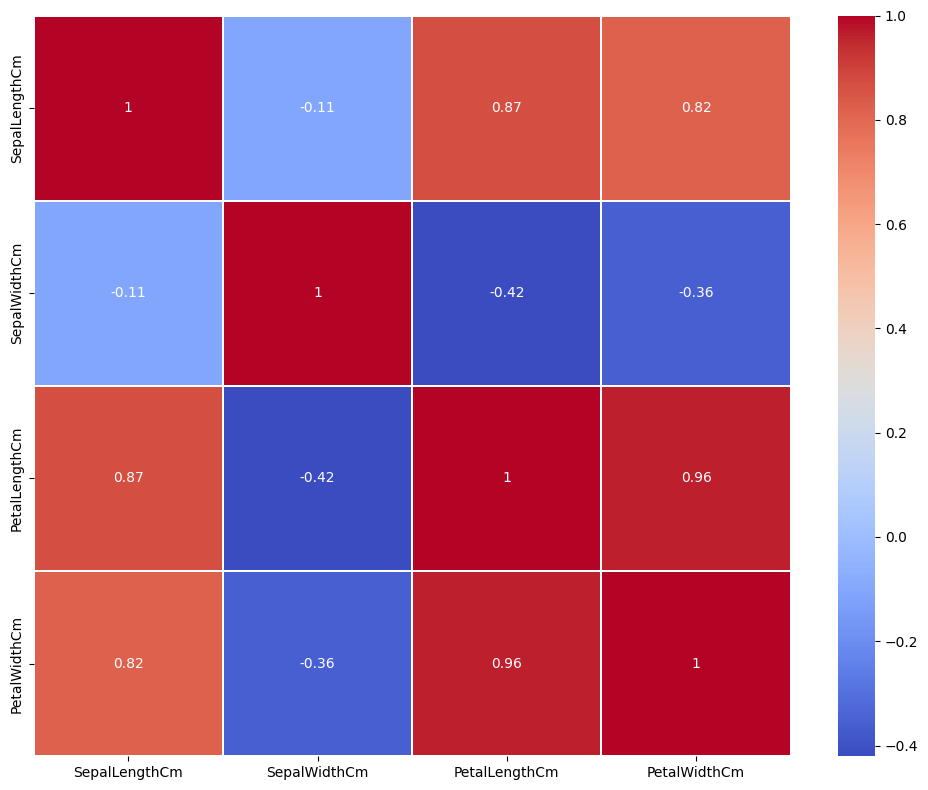

In [210]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=0.1, linecolor='white')
plt.tight_layout()

## Divided The 3 Label Into 3 Different sets, Each Set Has The Feature Values of its Label

In [211]:
df_seto = df[df['Species'] == 'Iris-setosa']
df_versi = df[df['Species'] == 'Iris-versicolor']
df_virg = df[df['Species'] == 'Iris-virginica']

## Plotting The 3 Sets, Each Set with Its Label and Its Color

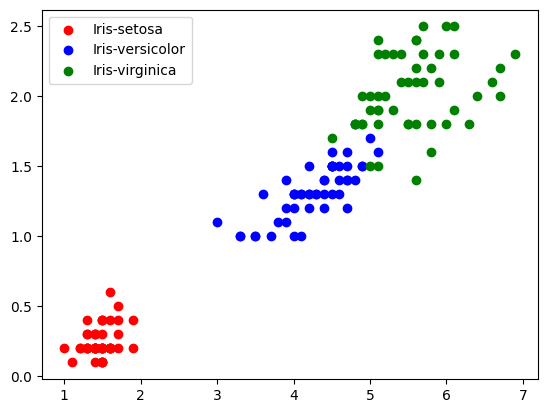

In [212]:
plt.scatter(df_seto['PetalLengthCm'], df_seto['PetalWidthCm'], color='r', label='Iris-setosa')
plt.scatter(df_versi['PetalLengthCm'], df_versi['PetalWidthCm'], color='b', label='Iris-versicolor')
plt.scatter(df_virg['PetalLengthCm'], df_virg['PetalWidthCm'], color='g', label='Iris-virginica')
plt.legend()

***
> # **Building The Model**
***

## Assigning All Columns (The Feature Columns) To ` X ` Value Without The Label Column (Species)

In [213]:
X = df.drop('Species', axis=1)

## Finding The Optimum Number of Cluster

***
Here Creating an Empty List To Append The SSE (Sum of The Squared Eerror) Into it.<br>
Also, Creating a For Loop From 1 to 10, and Each Time Assign The Loop Value In ` n_clusters = ` Parameter,<br>
Then Fitting The Algorithm With Features We Have, and Append The inertia Value (SSE) Into The List.
***

In [214]:
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    SSE.append(kmeans.inertia_)

D:\Installed programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Installed programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Installed programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Installed programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

## The All Values of SSE

In [215]:
SSE

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.53558205128205,
 38.949434844543546,
 34.299985543844244,
 29.95556887717758,
 27.84235606060606]

## Plotting The SEE Values in Line Plot To Deremine The Best Number of Clusters

***
Here, Choosing The ` n_clusters ` Depends on The Plot Below, In the Following Plot It Shows That Number 3 Is The Best Values,<br>
Becaues It Is The Only Value That There Is No Big Changes After It
***

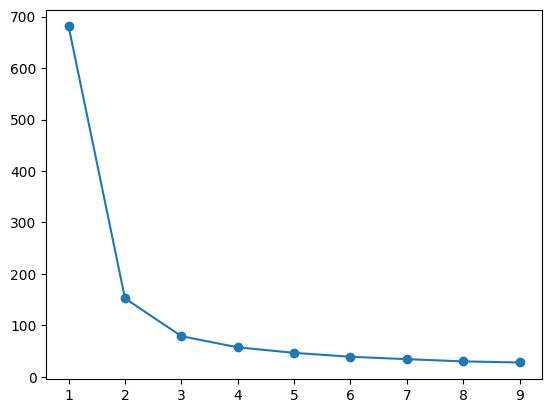

In [216]:
plt.plot(range(1,10), SSE, marker='o')

# Initializing The K-Means Algorithm

In [217]:
model = KMeans(n_clusters=3, n_init = 10, random_state = 0)

# Fitting And Prediction on Training Data

In [218]:
prediction = model.fit_predict(X)

D:\Installed programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# The Prediction Result

In [219]:
pd.DataFrame(prediction)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# The Cluster Centroids (The Center Points of Each Cluster) Values.

In [220]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Converting The Features Data into Array to Be Able to Access Specific Indexes

In [221]:
X = np.array(X)

# Plotting The Output

***
1. Creating a Scatter Plot of Data Points That Belong To Cluster 0 (Predicted By Kmeans).
	- ` X[prediction == 0, 2] ` and ` X[prediction == 0, 3] ` are Used To Select The Data Points In The 3rd (Index 2) and 4th (Index 3) Columns of The Dataset X For Cluster 0.
    - ` C='r' ` Sets The Color of The Points To Red.
    - ` S=100 ` Sets The Size of The Points To 100.
    - ` Label='iris-setosa' ` Sets The Label For This Cluster In The Legend.

&nbsp;

2. The Same As The Previous Line But For Cluster 1.
	- It Selects The Data Points In The 3rd And 4th Columns of The Dataset X For Cluster 1 And Sets The Points To Blue With a Size of 100. It Also Labels This Cluster as 'iris-versicolor' In The Legend.

&nbsp;

3. Similar To The Previous Lines, This One Is For Cluster 2.
	- Selecting The Data Points For Cluster 2 In The 3rd And 4th Columns Of The Dataset X. The Color Is Set To Green, Size To 100, And The Label Is 'iris-virginica' In The Legend.

&nbsp;

4. ` plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], c='black', s=200, label='Centroids') ` 
	- This Line Adds Black Points To The Plot To Represent The Cluster Centroids (The Center Points Of Each Cluster).
***

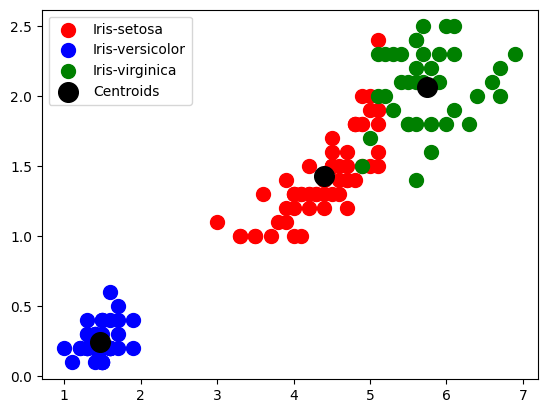

In [238]:
plt.scatter(X[prediction == 0, 2], X[prediction == 0, 3], c='r',s=100, label='Iris-setosa')
plt.scatter(X[prediction == 1, 2], X[prediction == 1, 3], c='b', s=100, label='Iris-versicolor')
plt.scatter(X[prediction == 2, 2], X[prediction == 2, 3], c='g', s=100, label='Iris-virginica')
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], c = 'black', s=200, label = 'Centroids')

plt.legend()